Data source: https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Energy_production_and_imports#Production_of_primary_energy_decreased_between_2007_and_2017

https://appsso.eurostat.ec.europa.eu/nui/submitViewTableAction.do

In [19]:
import pandas as pd
import numpy as np
import folium
from folium import plugins
import urllib.request, json 
import requests
from bs4 import BeautifulSoup

In [7]:
dfp = pd.read_excel('/Users/joachimluttinen/Dropbox/Business and Data Analyst/Own_Projects/Choropleth_map/renewable_energy_share_of_total_production_Europe.xlsx')

In [6]:
dfc = pd.read_excel('/Users/joachimluttinen/Dropbox/Business and Data Analyst/Own_Projects/Choropleth_map/renewable_energy_share_of_total_consumption_Europe.xlsx')

In [8]:
dfp.dtypes

Country     object
2008       float64
2009       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
dtype: object

In [9]:
df_country = dfp['Country']

In [10]:
dfp_years = dfp.drop(['Country'], axis = 1)*100

In [11]:
dfprod = pd.concat([df_country, dfp_years.reindex(df_country.index)], axis=1)
dfprod

,Country,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Belgium,6.805505,7.535467,8.269268,10.658451,14.220956,15.646568,18.518897,22.412295,18.126077,19.700303
1,Bulgaria,7.581051,10.012925,13.773860,9.273731,12.842685,17.457980,16.739451,18.802926,17.091258,14.910348
2,Czech Republic,4.881329,6.336923,7.567361,9.093159,10.070841,11.761389,11.879748,12.762624,12.721139,12.411376
3,Denmark,27.572646,27.658522,31.982399,40.253768,48.327416,45.960337,55.901818,65.492185,60.438260,70.607061
4,Germany,15.555272,16.934789,17.633580,21.221852,23.821586,24.828706,26.906063,29.963919,29.962950,34.099498
5,Estonia,1.871092,6.155164,8.052241,9.149570,12.338451,9.187273,11.158170,14.415452,12.434297,13.847176
6,Ireland,12.958445,15.767087,13.774940,19.966092,19.989158,23.040988,25.572909,28.696868,25.577104,29.414708
7,Greece,10.333949,13.779883,18.376678,14.145451,16.960697,25.173920,24.383768,28.727852,27.398054,25.111779
8,Spain,20.712342,26.108228,33.508285,30.590610,30.458522,40.469255,40.921762,35.738452,39.357993,32.895677
9,France,13.693230,13.931706,14.584477,12.415969,15.723175,17.908555,17.420225,16.671451,18.447951,17.408750


In [12]:
dfc_years = dfc.drop(['Country'], axis = 1)*100
dfcon = pd.concat([df_country, dfc_years.reindex(df_country.index)], axis=1)
dfcon

,Country,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Belgium,3.225952,3.986649,4.661631,5.469845,6.191812,6.233730,6.388334,6.896120,6.956359,7.224386
1,Bulgaria,5.437228,6.521138,8.360626,7.343870,9.114313,11.029728,10.386418,11.084320,11.108886,10.328428
2,Czech Republic,5.594722,6.733543,6.973166,7.991470,8.633775,9.425216,10.088405,10.318970,10.531411,10.407084
3,Denmark,16.533669,17.720557,19.809808,21.835792,23.726368,24.560979,27.141011,29.251678,29.713988,32.844354
4,Germany,6.873867,7.686897,8.241037,9.224834,10.097370,10.227707,11.257760,12.117552,12.194985,13.255618
5,Estonia,11.604483,14.809415,14.963412,14.745714,15.657147,13.871858,14.794295,16.683717,16.115618,18.427706
6,Ireland,3.605334,4.373472,4.393023,5.540964,5.556325,6.276785,7.130954,7.592725,7.410011,8.998945
7,Greece,5.469477,6.183956,7.568891,7.817622,9.051061,10.959292,10.277536,11.636625,11.266912,12.031733
8,Spain,7.421726,9.624286,11.536482,11.425519,12.466373,14.649924,15.255194,13.807841,14.392956,13.022020
9,France,7.172707,7.612683,8.274885,7.355221,8.669788,9.594530,9.303245,9.460523,10.482577,10.386885


In [13]:
### import urllib.request, json 
with urllib.request.urlopen("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json") as url:
    data = json.loads(url.read().decode())

In [14]:
world_geo = data
world_map = folium.Map(location = [57, 18], zoom_start = 3)
world_map

In [20]:
# Visualization of the % of renewable energy production of total energy production

world_mapworld_geo = data


# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(0,
                              100,
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration


# let Folium determine the scale.
world_map = folium.Map(location = [57, 18], zoom_start = 3, tiles='cartodbpositron')
world_map.choropleth(
    geo_data=world_geo,
    data=dfprod,
    columns=['Country', '2017'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale, #[0,20,40,60,80,100],
    fill_color='BuPu', # YlGn , YlOrRd , BuPu
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='% of renewable energy production of total energy production',
    reset=True
)
world_map

In [21]:
world_mapworld_geo = data


# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(0,
                              100,
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration


# let Folium determine the scale.
world_map = folium.Map(location = [57, 18], zoom_start = 3, tiles='cartodbpositron')
world_map.choropleth(
    geo_data=world_geo,
    data=dfprod,
    columns=['Country', '2017'],
    key_on='feature.properties.name',
    threshold_scale=[0,10,20,30,40,101],
    fill_color='BuPu', # YlGn , YlOrRd , BuPu
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='% of renewable energy production of total energy production',
    reset=True
)
world_map

In [22]:
# Visualization of renenwable energy consumption of total eenrgy consumption

world_mapworld_geo = data


# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(0,
                              100,
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration


# let Folium determine the scale.
world_map = folium.Map(location = [57, 18], zoom_start = 3, tiles='cartodbpositron')
world_map.choropleth(
    geo_data=world_geo,
    data=dfcon,
    columns=['Country', '2017'],
    key_on='feature.properties.name',
    threshold_scale=[0,10,20,30,40,100],
    fill_color='BuPu', # YlGn , YlOrRd , BuPu
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='% of energy consumption from renewable sources',
    reset=True
)
world_map

In [23]:
import matplotlib 
import matplotlib.pyplot as plt

In [24]:
dfprod_plot = dfprod.set_index('Country').transpose()
dfprod_plot

Country,Belgium,Bulgaria,Czech Republic,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,...,Norway,Montenegro,Macedonia,Albania,Republic of Serbia,Turkey,Bosnia and Herzegovina,Kosovo,Ukraine,Georgia
2008,6.805505,7.581051,4.881329,27.572646,15.555272,1.871092,12.958445,10.333949,20.712342,13.693230,...,99.525936,54.420085,13.311356,100.000000,27.046768,17.353635,NaN,1.472298,6.138135,NaN
2009,7.535467,10.012925,6.336923,27.658522,16.934789,6.155164,15.767087,13.779883,26.108228,13.931706,...,96.646115,75.036232,18.604042,99.980777,29.079902,19.586084,NaN,2.411576,6.979490,NaN
2010,8.269268,13.773860,7.567361,31.982399,17.633580,8.052241,13.774940,18.376678,33.508285,14.584477,...,95.847098,68.373943,33.489401,99.986786,32.992153,26.392049,NaN,3.037926,7.091639,NaN
2011,10.658451,9.273731,9.093159,40.253768,21.221852,9.149570,19.966092,14.145451,30.590610,12.415969,...,96.622242,45.328301,21.219572,98.592221,23.945596,25.339043,NaN,1.808444,5.744880,NaN
2012,14.220956,12.842685,10.070841,48.327416,23.821586,12.338451,19.989158,16.960697,30.458522,15.723175,...,97.983896,51.935365,16.666707,100.000000,26.957254,27.243605,NaN,1.608374,5.907736,NaN
2013,15.646568,17.457980,11.761389,45.960337,24.828706,9.187273,23.040988,25.173920,40.469255,17.908555,...,97.868175,63.474306,26.140671,100.000000,27.266347,28.856638,NaN,2.196113,8.119179,82.225237
2014,18.518897,16.739451,11.879748,55.901818,26.906063,11.158170,25.572909,24.383768,40.921762,17.420225,...,97.877417,55.210944,24.036974,100.000000,34.189669,20.915560,34.864595,2.784375,6.022691,80.368973
2015,22.412295,18.802926,12.762624,65.492185,29.963919,14.415452,28.696868,28.727852,35.738452,16.671451,...,97.900173,49.650350,35.934428,100.000000,28.244298,32.017634,33.769315,2.292524,5.315985,78.038846
2016,18.126077,17.091258,12.721139,60.438260,29.962950,12.434297,25.577104,27.398054,39.357993,18.447951,...,98.005129,58.678095,36.709417,100.000000,29.464697,32.972703,31.883448,4.104433,6.616772,80.681239
2017,19.700303,14.910348,12.411376,70.607061,34.099498,13.847176,29.414708,25.111779,32.895677,17.408750,...,97.992997,45.146609,23.143168,100.000000,26.693638,29.428759,24.419029,3.044925,7.982035,80.635146


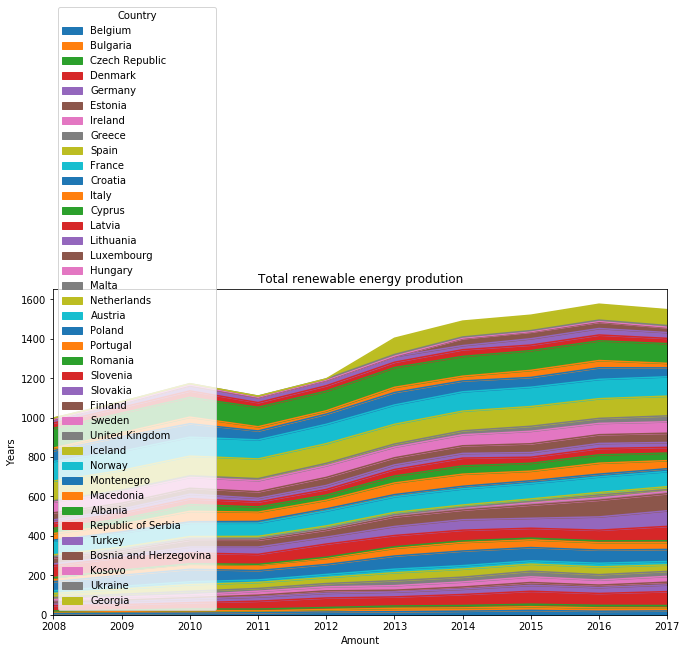

In [25]:
dfprod_plot.plot(kind='area', 
             stacked=True,
             figsize=(11, 6), # pass a tuple (x, y) size
            )

plt.title('Total renewable energy prodution')
plt.ylabel('Years')
plt.xlabel('Amount')

plt.show()